# 1D Schrödinger Equation Solver
This notebook solves the time-independent Schrödinger equation in 1D for a harmonic oscillator potential using the finite difference method.


We want to solve the **time-independent Schrödinger equation**:

$$
\hat{H}\psi(x) = E \psi(x)
$$

with the Hamiltonian:

$$
\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)
$$

For the **harmonic oscillator**, the potential is:

$$
V(x) = \frac{1}{2}kx^2
$$


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants (atomic units)
hbar = 1
m = 1


In [3]:

# Spatial grid
x_min, x_max, N = -5, 5, 1000
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Potential: harmonic oscillator
k = 1
V = 0.5 * k * x**2


In [4]:

# Kinetic energy (finite difference)
T = np.zeros((N, N))
for i in range(N):
    if i > 0: T[i,i-1] = -1
    T[i,i] = 2
    if i < N-1: T[i,i+1] = -1
T *= -(hbar**2)/(2*m*dx**2)


In [5]:

# Hamiltonian
H = T + np.diag(V)

# Solve eigenproblem
energies, wavefunctions = eigh(H)

# Normalize first 3 wavefunctions
for n in range(3):
    wavefunctions[:,n] /= np.sqrt(np.sum(np.abs(wavefunctions[:,n])**2)*dx)

energies[:5]  # show first 5 energies


array([-19959.52000313, -19958.52001565, -19957.52004063, -19956.52007716,
       -19955.52011672])

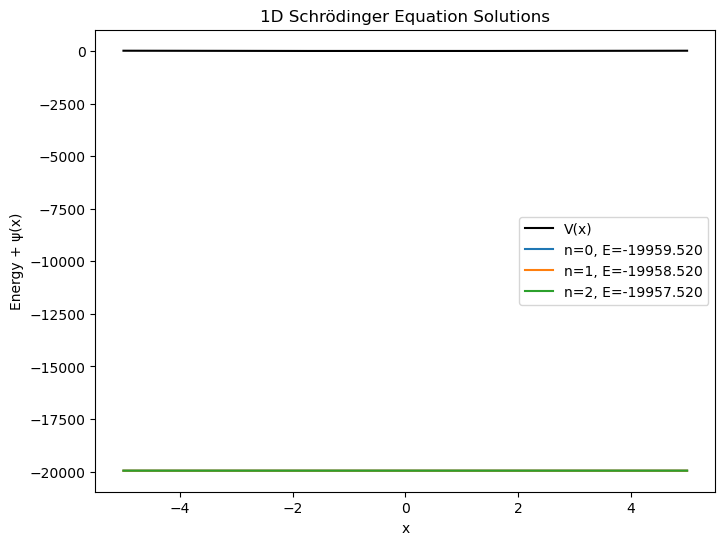

In [6]:

# Plot
plt.figure(figsize=(8,6))
plt.plot(x, V, 'k', label='V(x)')
for n in range(3):
    plt.plot(x, wavefunctions[:,n] + energies[n], label=f'n={n}, E={energies[n]:.3f}')
plt.xlabel('x')
plt.ylabel('Energy + ψ(x)')
plt.title('1D Schrödinger Equation Solutions')
plt.legend()
plt.show()


# Time-Dependent Schrödinger Equation (1D Gaussian Wavepacket)

Simulates a **Gaussian wavepacket** evolving under the **time-dependent Schrödinger equation (TDSE)** in 1D using the **Crank–Nicolson** method (unconditionally stable and norm-preserving). You can switch between a **free particle** and a **harmonic oscillator** potential, and adjust physical/numerical parameters.

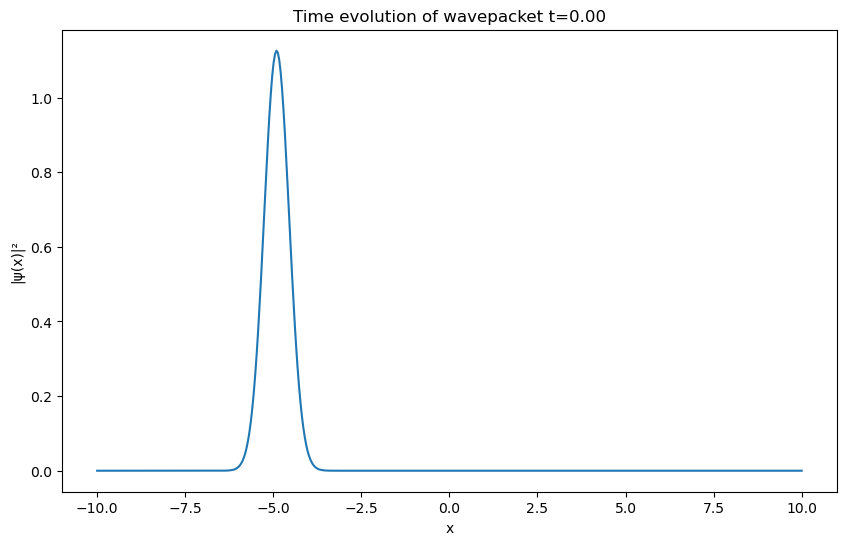

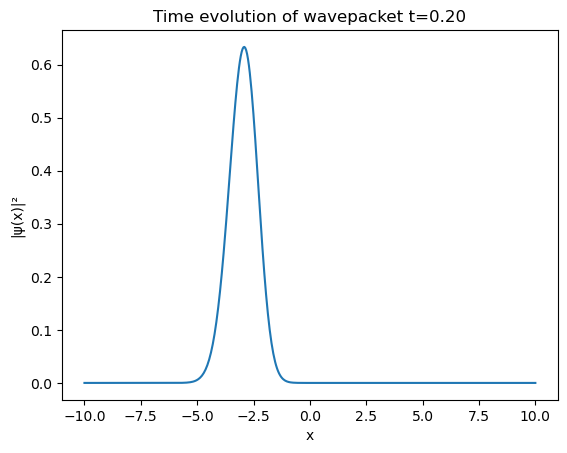

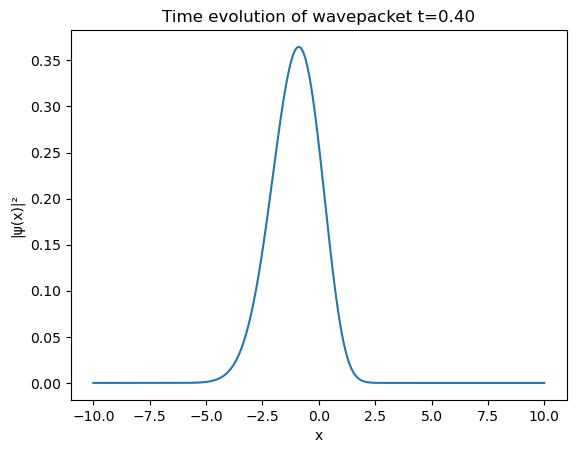

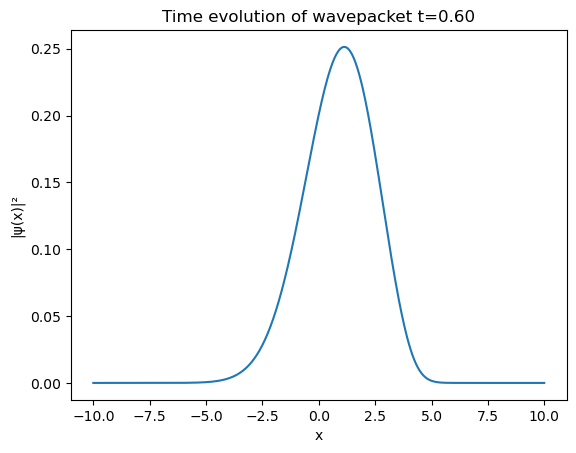

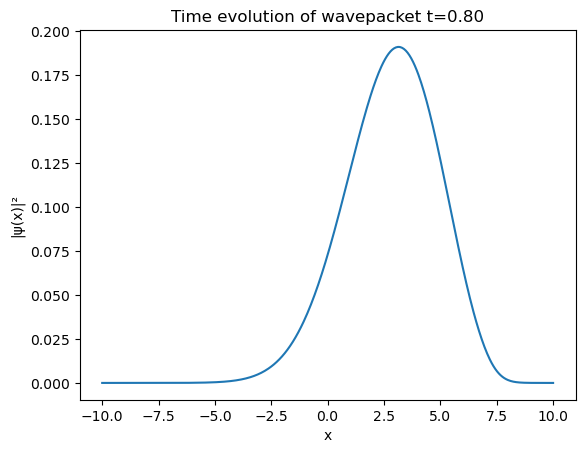

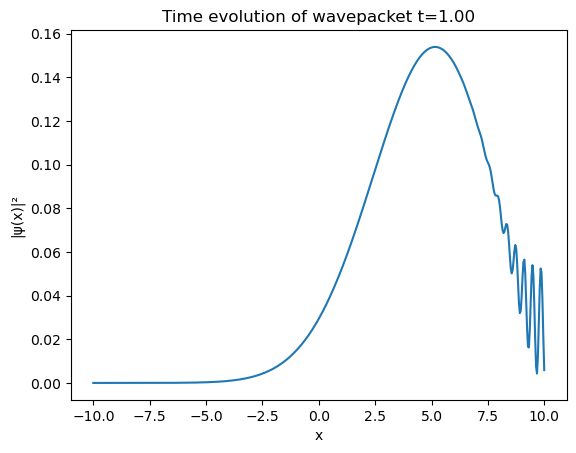

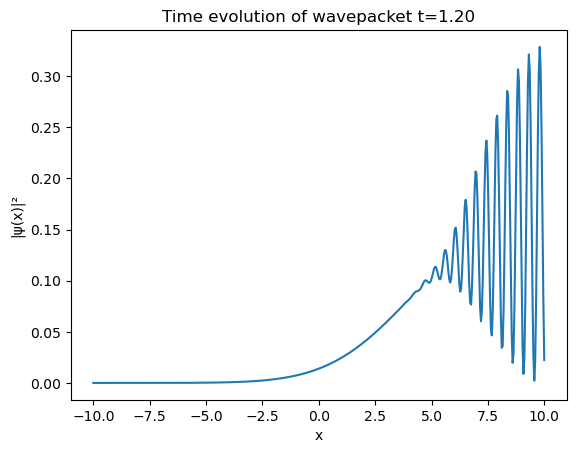

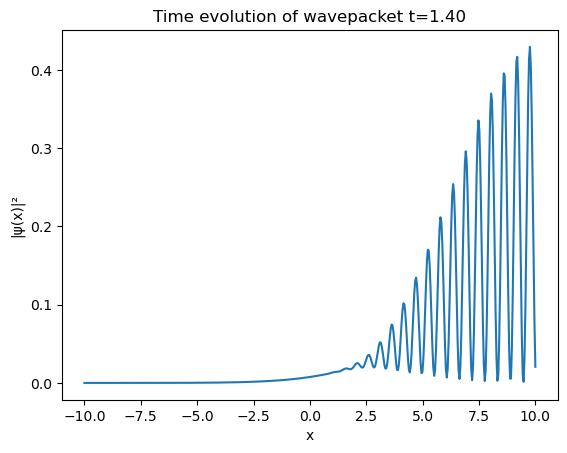

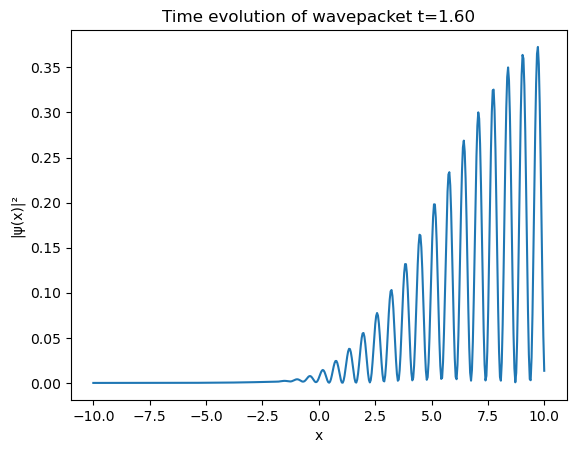

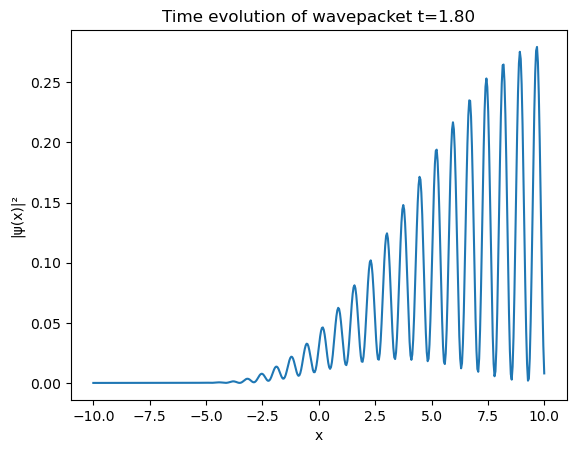

In [8]:
# 05_wavepacket_tdse.ipynb
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# Constants
hbar = 1
m = 1

# Spatial grid
x_min, x_max, N = -10, 10, 500
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Time parameters
dt = 0.01
t_max = 2
steps = int(t_max/dt)

# Potential: free particle
V = np.zeros(N)

# Initial Gaussian wavepacket
x0 = -5
k0 = 5
sigma = 0.5
psi = (1/(sigma*np.sqrt(np.pi)))**0.5 * np.exp(-(x-x0)**2/(2*sigma**2)) * np.exp(1j*k0*x)
psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)

# Crank-Nicolson matrices
alpha = 1j*hbar*dt/(2*m*dx**2)
main_diag = (1 + 2*alpha + 1j*dt*V/(2*hbar))*np.ones(N)
off_diag = -alpha*np.ones(N-1)
A = diags([off_diag, main_diag, off_diag], [-1,0,1], format='csc')
B = diags([-off_diag, 2 - main_diag, -off_diag], [-1,0,1], format='csc')
lu = splu(A)

# Time evolution and plot
plt.figure(figsize=(10,6))
for n in range(steps):
    b = B @ psi
    psi = lu.solve(b)
    if n % 20 == 0:
        plt.clf()
        plt.plot(x, np.abs(psi)**2)
        plt.xlabel("x")
        plt.ylabel("|ψ(x)|²")
        plt.title(f"Time evolution of wavepacket t={n*dt:.2f}")
        plt.pause(0.01)
plt.show()


# plots the 3D evolution of the wavepacket

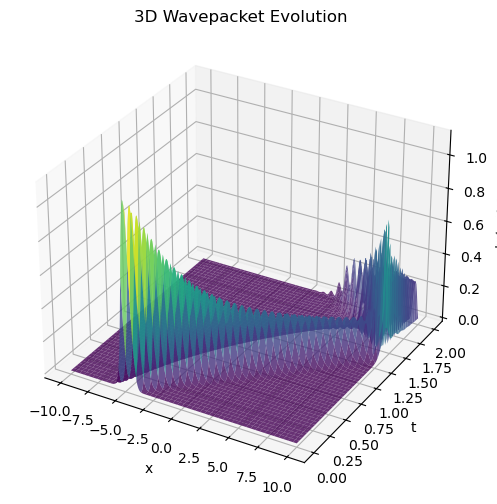

In [7]:
# 06_wavepacket_3D.ipynb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# Constants
hbar = 1
m = 1

# Spatial grid
x_min, x_max, N = -10, 10, 300
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Time parameters
dt = 0.02
t_max = 2
steps = int(t_max/dt)

# Potential: free particle
V = np.zeros(N)

# Initial Gaussian wavepacket
x0 = -5
k0 = 5
sigma = 0.5
psi = (1/(sigma*np.sqrt(np.pi)))**0.5 * np.exp(-(x-x0)**2/(2*sigma**2)) * np.exp(1j*k0*x)
psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)

# Crank-Nicolson
alpha = 1j*hbar*dt/(2*m*dx**2)
main_diag = (1 + 2*alpha + 1j*dt*V/(2*hbar))*np.ones(N)
off_diag = -alpha*np.ones(N-1)
A = diags([off_diag, main_diag, off_diag], [-1,0,1], format='csc')
B = diags([-off_diag, 2 - main_diag, -off_diag], [-1,0,1], format='csc')
lu = splu(A)

# Store probability density
prob_density = np.zeros((steps, N))
for n in range(steps):
    b = B @ psi
    psi = lu.solve(b)
    prob_density[n,:] = np.abs(psi)**2

# Meshgrid for 3D plot
T, X = np.meshgrid(np.linspace(0, t_max, steps), x)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, prob_density.T, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('|ψ(x,t)|²')
ax.set_title('3D Wavepacket Evolution')
plt.show()
